In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import time

In [4]:
#Preprocessing the Data
train = pd.read_csv('train.csv')
test = pd.read_csv('testX.csv')

# Remove Id and Label columns from the training data
train_x = train.drop(['Id', 'Label'], axis = 1)

# Take Label column as target variable
train_y = train['Label']

# Remove Id column from the test data
test = test.drop('Id', axis = 1)

# Spilt the data into 90% training and 10% validation data
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.1, random_state=42)

# Transform the data
scalar = StandardScaler(with_std=False)
scalar.fit(X_train)
train_scaled = scalar.transform(X_train)
val_scaled = scalar.transform(X_val)
test_scaled = scalar.transform(test)

In [5]:
#Normalizing the Data
from sklearn.metrics import accuracy_score
pca = PCA()
pca.fit(train_scaled)
train_x_transformed  = pca.transform(train_scaled)
val_x_transformed = pca.transform(val_scaled)
test_transformed = pca.transform(test_scaled)

83
Variance explained by 85 components: 90.2344871977032


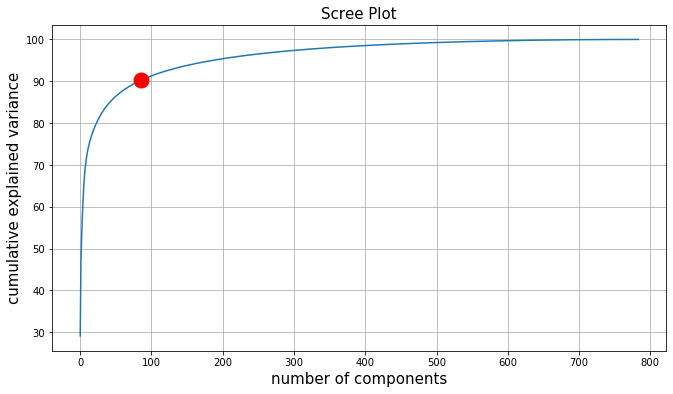

In [9]:
variance = pca.explained_variance_ratio_.cumsum()
for i in range(0,len(variance)):
  if(variance[i] > 0.90):
    print(i)
    break;

print('Variance explained by 85 components:', variance[85]*100)

plt.figure(figsize = (11,6))
plt.plot(np.arange(0, 784), variance*100)
plt.plot(85, variance[85]*100, 'ro', ms = 15)
plt.xlabel('number of components', fontsize = 15)
plt.ylabel('cumulative explained variance', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.grid(True)

In [10]:
# Check for number of neighbour
nbr = [10,20,30,40,50,60,70,80,90,100]
acc1 = []
time1 = []
for i in nbr:
    neigh = KNeighborsClassifier(n_neighbors=i)
    start1 = time.time()
    neigh.fit(train_x_transformed[:,:85], y_train)
    stop1 = time.time()
    y_pred = neigh.predict(val_x_transformed[:,:85])
    accuracy = accuracy_score(y_val, y_pred)*100
    acc1.append(accuracy)
    time1.append(stop1-start1)
print("Accuracy: ",acc1)
print("Time: ", time1)

Accuracy:  [85.41666666666666, 85.38333333333334, 85.31666666666666, 85.0, 84.75, 84.5, 84.55, 84.38333333333333, 84.28333333333333, 83.88333333333333]
Time:  [1.8680987358093262, 1.8769826889038086, 1.9078962802886963, 1.5987629890441895, 1.6126763820648193, 1.6047091484069824, 1.6106939315795898, 1.6465981006622314, 1.611711025238037, 1.8520114421844482]


In [11]:
from sklearn.neighbors import KNeighborsClassifier
nbr = [1,2,3,4,5,6,7,8,9,10]
acc2 = []
time2 = []
for i in nbr:
    neigh = KNeighborsClassifier(n_neighbors=i)
    start2 = time.time()
    neigh.fit(train_x_transformed[:,:85], y_train)
    stop2 = time.time()
    y_pred = neigh.predict(val_x_transformed[:,:85])
    accuracy = accuracy_score(y_val, y_pred)*100
    acc2.append(accuracy)
    time2.append(stop2-start2)
print("Accuracy: ", acc2)
print("Time: ", time2)

Accuracy:  [82.81666666666668, 80.9, 84.46666666666667, 83.85000000000001, 85.55, 84.91666666666666, 85.71666666666667, 85.56666666666666, 86.0, 85.41666666666666]
Time:  [2.012648344039917, 1.7134194374084473, 1.5907480716705322, 1.5857610702514648, 1.5957343578338623, 1.635655164718628, 1.6037392616271973, 1.607729196548462, 1.622661828994751, 1.6017177104949951]


In [13]:
from sklearn.neighbors import KNeighborsClassifier
nbr = [11,12,13,14,15,16,17,18,19,20]
acc3 = []
time3 = []
for i in nbr:
    neigh = KNeighborsClassifier(n_neighbors=i)
    start3 = time.time()
    neigh.fit(train_x_transformed[:,:85], y_train)
    stop3 = time.time()
    y_pred = neigh.predict(val_x_transformed[:,:85])
    accuracy = accuracy_score(y_val, y_pred)*100
    acc3.append(accuracy)
    time3.append(stop3-start3)
print("Accuracy: ",acc3)
print("Time: ", time3)

Accuracy:  [85.93333333333332, 85.46666666666667, 85.91666666666666, 85.38333333333334, 85.7, 85.31666666666666, 85.6, 85.5, 85.68333333333334, 85.38333333333334]
Time:  [1.7293498516082764, 2.0465657711029053, 1.6864640712738037, 1.622661828994751, 1.6865181922912598, 1.5986993312835693, 2.122333288192749, 2.254971504211426, 1.6087324619293213, 1.5927684307098389]


In [14]:
from sklearn.neighbors import KNeighborsClassifier
import time

neigh = KNeighborsClassifier(n_neighbors=9)
start_train = time.time()
neigh.fit(train_x_transformed[:,:85], y_train)
stop_train = time.time()

start_test = time.time()
y_pred = neigh.predict(val_x_transformed[:,:85])
stop_test = time.time()

acc4 = accuracy_score(y_val, y_pred)*100
print("Accuracy is ",acc4)
print("Training time is ", stop_train-start_train)
print("Testing time is ", stop_test-start_test)

Accuracy is  86.0
Training time is  1.6575927734375
Testing time is  11.023545026779175
